## Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sb

### Reading the data and storing it in a variable

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fetching columns of the dataset

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
sb.set()

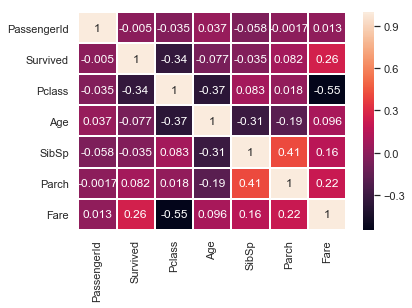

In [7]:
sb.heatmap(data.corr(), annot=True, linewidth = 1, linecolor='w')

In [8]:
data.shape

(891, 12)

In [9]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
class_survival = data.groupby('Pclass')['Survived'].value_counts()

In [11]:
class_survival

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

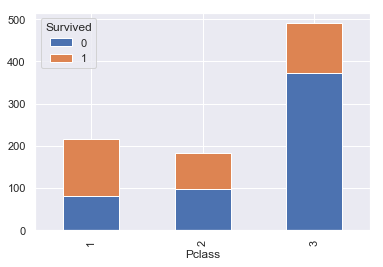

In [12]:
class_survival.unstack().plot(kind='bar', stacked=True)

## Using crossby in Pclass vs survival 

In [13]:
pclass_data = pd.crosstab(data['Pclass'], data['Survived'])

In [14]:
pclass_data

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


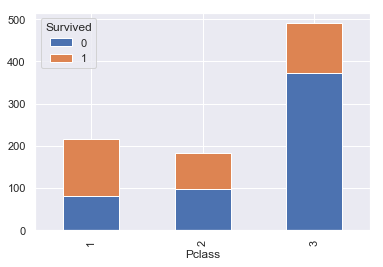

In [15]:
pclass_data.plot(kind = 'bar', stacked=True)

In [16]:
pclass_data

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [17]:
pclass_data['total'] = pclass_data.sum(axis=1)

In [18]:
pclass_data

Survived,0,1,total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491


In [19]:
pclass_data = pclass_data.apply(lambda x: round(100*x/pclass_data['total']))

In [20]:
pclass_data

Survived,0,1,total
Pclass,,,
1,37.0,63.0,100.0
2,53.0,47.0,100.0
3,76.0,24.0,100.0


In [21]:
pclass_data.drop('total', axis=1, inplace=True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

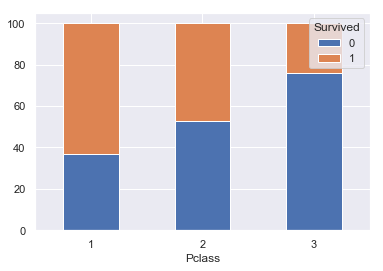

In [22]:
pclass_data.plot(kind='bar', stacked=True)
mpt.xticks(rotation=0)

## Predicting data

In [23]:
training_data = data[['PassengerId', 'Pclass', 'Fare']]

In [24]:
output_data = data['Survived']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X, x_text, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42) 
#X,Y are training i/p and o/p and x,y are evaluating i/p o/p
#test_size is 30%, meaning 70trainig, 30 test,can be 80-20, but not half
#random is shuffle values

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X,Y)                    #fit means training

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
predictions = model.predict(x_text)

In [31]:
predictions[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
confusion_matrix(predictions, y_test)               

array([[134,  58],
       [ 23,  53]], dtype=int64)

In [34]:
#the above cell implies that 134 and 53 predictions are correct rest are wrong

In [35]:
score = accuracy_score(predictions, y_test)
score                                               #this means approx 70% of the predicyions are correct

0.6977611940298507

## Converting gender options into boolean

In [36]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [37]:
def bool_converter(x):
    if(x=='male'):
        return 0
    else:
        return 1


In [38]:
data['Gender'] = data['Sex'].apply(bool_converter)

In [39]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [40]:
#data.drop('gender', axis=1, inplace=True)

In [41]:
data[['Sex', 'Gender']].head()

,Sex,Gender
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [42]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender'],
      dtype='object')

## Predicting chances of survival on the basis of gender of the person

In [43]:
training_data2 = data[['PassengerId', 'Pclass', 'Fare', 'Gender']]

In [44]:
output_data2 = data['Survived']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X, x_test, Y, y_test = train_test_split(training_data2, output_data2, test_size=0.3, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model2 = LogisticRegression()

In [49]:
model2.fit(X,Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
predictions2 = model2.predict(x_test)

In [51]:
predictions2[:15]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [53]:
confusion_matrix(predictions2, y_test)

array([[134,  33],
       [ 23,  78]], dtype=int64)

In [54]:
score = accuracy_score(predictions2, y_test)

In [55]:
score

0.7910447761194029

## test_data file

In [56]:
test_data = pd.read_csv('test.csv')

In [57]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
test_data = test_data[['PassengerId', 'Pclass', 'Fare']]

In [59]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [60]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [61]:
test_predictions = model.predict(test_data)

In [62]:
test_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
test_submission = {
    'PassengerId' : test_data['PassengerId'],
    'Survived': test_predictions
}

In [64]:
test_submission = pd.DataFrame(test_submission)

In [65]:
test_submission = test_submission.set_index('PassengerId')

In [66]:
test_submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [67]:
test_submission.to_csv('submission.csv')

In [68]:
#Logistic Regression-Columns-PassengerId, Fare,Pclass

## based on gender- test data

In [69]:
def bool_converter(x):
    if(x=='male'):
        return 0
    else:
        return 1


In [70]:
test_data2 = pd.read_csv('test.csv')

In [71]:
test_data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
test_data2['Gender'] = test_data2['Sex'].apply(bool_converter)

In [73]:
test_data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [74]:
test_data2 = test_data2[['PassengerId', 'Pclass', 'Fare', 'Gender']]

In [75]:
test_data2['Fare'] = test_data2['Fare'].fillna(test_data2['Fare'].mean())

In [76]:
test_data2.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
Gender         0
dtype: int64

In [77]:
test_predictions2 = model2.predict(test_data2)

In [78]:
test_predictions2[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [79]:
test_submission2 = {
    'PassengerId' : test_data['PassengerId'],
    'Survived': test_predictions2
}

In [80]:
test_submission2 = pd.DataFrame(test_submission2)

In [81]:
test_submission2 = test_submission2.set_index('PassengerId')

In [82]:
test_submission2.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [83]:
test_submission2.to_csv('submission_with_gender.csv')

## Creating a 100% stacked bar chart - gender vs survival

In [84]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [85]:
gender_survival = pd.crosstab(data['Sex'], data['Survived'])

In [86]:
gender_survival

Survived,0,1
Sex,,
female,81,233
male,468,109


In [87]:
gender_survival['total'] = gender_survival.sum(axis=1)

In [88]:
gender_survival

Survived,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [89]:
gender_survival = gender_survival.apply(lambda x: round(100*x/gender_survival['total']))

In [90]:
gender_survival

Survived,0,1,total
Sex,,,
female,26.0,74.0,100.0
male,81.0,19.0,100.0


In [91]:
gender_survival.drop('total', axis=1, inplace=True)

In [92]:
gender_survival.columns

Index([0, 1], dtype='object', name='Survived')

In [93]:
def surv(x):
    if(x==0):
        x='Not Survive'
        return x
    else:
        x= 'Survive'
        return x

In [94]:
gender_survival['Survived'] = gender_survival['Survived'].apply(surv)

KeyError: 'Survived'

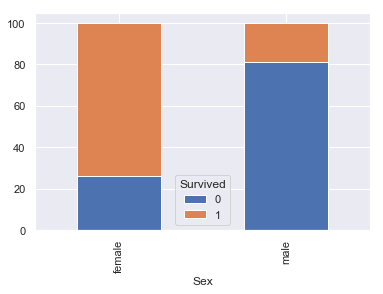

In [95]:
gender_survival.plot(kind = 'bar', stacked=True)

## Adding just another accuracy column

In [96]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [97]:
sample_data = data[['Sex', 'Age', 'Parch']].copy()

In [98]:
sample_data.tail()

,Sex,Age,Parch
886,male,27.0,0
887,female,19.0,0
888,female,NaN,2
889,male,26.0,0
890,male,32.0,0


In [99]:
sample_data.tail()

,Sex,Age,Parch
886,male,27.0,0
887,female,19.0,0
888,female,NaN,2
889,male,26.0,0
890,male,32.0,0


In [100]:
new_list = [1 if ((sample_data.iloc[x]['Sex']=='female') & (sample_data.iloc[x]['Parch']>0) & (sample_data.iloc[x]['Age']>17)) | 
                          ((sample_data.iloc[x]['Age']<17)) else 0 for x in range(sample_data.shape[0])]

In [101]:
len(new_list)

891

In [116]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender', 'try'],
      dtype='object')

In [118]:
sample_data = data[['Sex', 'Age', 'Parch', 'Pclass']]

In [119]:
sample_list = [1 if ((sample_data.iloc[x]['Sex'] == 'female') & (sample_data.iloc[x]['Pclass'] == 1) & (sample_data.iloc[x]['Parch']>1))
              else 2 if ((sample_data.iloc[x]['Sex'] == 'female') & (sample_data.iloc[x]['Pclass'] == 1))
              else 3 if ((sample_data.iloc[x]['Sex'] == 'female') & (sample_data.iloc[x]['Pclass'] == 2) & (sample_data.iloc[x]['Parch']>1))
              else 4 for x in range(sample_data.shape[0]) ]

In [120]:
data['sample'] = sample_list

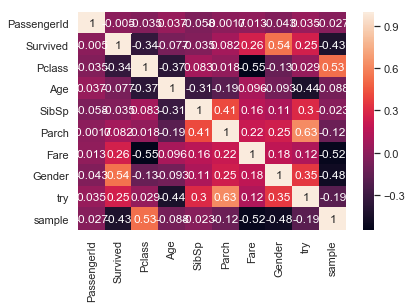

In [122]:
sb.heatmap(data.corr(), annot=True)

In [102]:
#[new_list[x] for x in range(sample_data.shape[0])]

In [103]:
sample_data['New'] = new_list[0:891]

In [104]:
sample_data.tail()

,Sex,Age,Parch,New
886,male,27.0,0,0
887,female,19.0,0,0
888,female,NaN,2,0
889,male,26.0,0,0
890,male,32.0,0,0


In [105]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [106]:
data['try']=sample_data['New']

In [107]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,try
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


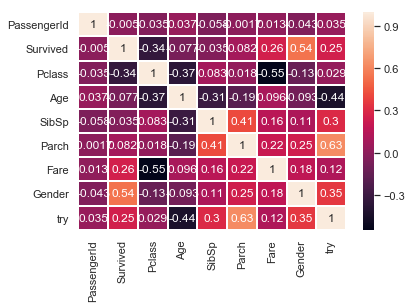

In [108]:
sb.heatmap(data.corr(), annot=True, linewidth=1, linecolor='w')

In [109]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender', 'try'],
      dtype='object')

In [110]:
training_data3 = data[['PassengerId', 'Pclass', 'Fare', 'Gender', 'try']]

In [112]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,try
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [155]:
output_data3 = data['Survived']

In [156]:
from sklearn.model_selection import train_test_split

In [158]:
X, x_test, Y, y_test = train_test_split(training_data3, output_data3, test_size=0.3, random_state=42)

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
model3 = LogisticRegression()

In [161]:
model3.fit(X, Y)

C:\Users\ishit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
model3_predictions = model3.predict(x_test)

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [165]:
confusion_matrix(model3_predictions, y_test)

array([[135,  39],
       [ 22,  72]], dtype=int64)

In [166]:
score3 = accuracy_score(model3_predictions, y_test)

In [167]:
score3

0.7723880597014925